In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import tensorflow as tf
import keras 
import cv2
import warnings
warnings.simplefilter('ignore')
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D,Input,MaxPooling2D,Flatten,Activation,BatchNormalization,Dense,Dropout,AveragePooling2D

2024-05-27 10:21:38.210188: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_dir=r"/Users/soulu/Documents/#Tamanna Singh/CalTech/Course End Projects/Emotion Recognition/data/train"
train_dir

'/Users/soulu/Documents/#Tamanna Singh/CalTech/Course End Projects/Emotion Recognition/data/train'

In [3]:
train_set=ImageDataGenerator(rotation_range=15,
                            rescale=1./255,
                              shear_range=0.2,
                            zoom_range=0.1,
                            width_shift_range=0.1,
                            height_shift_range=0.1)
train_gen=train_set.flow_from_directory(train_dir,target_size=(48,48),shuffle=True,class_mode='categorical',batch_size=64,color_mode='grayscale')

Found 28820 images belonging to 7 classes.


In [4]:
train_images,train_labels=next(train_gen)

In [5]:
train_images.shape

(64, 48, 48, 1)

In [6]:
train_labels.shape

(64, 7)

In [7]:
label_names={0:'angry',1:'disgust',2:'fear',3:'happy',4:'neutral',5:'sad',6:'surprise'}

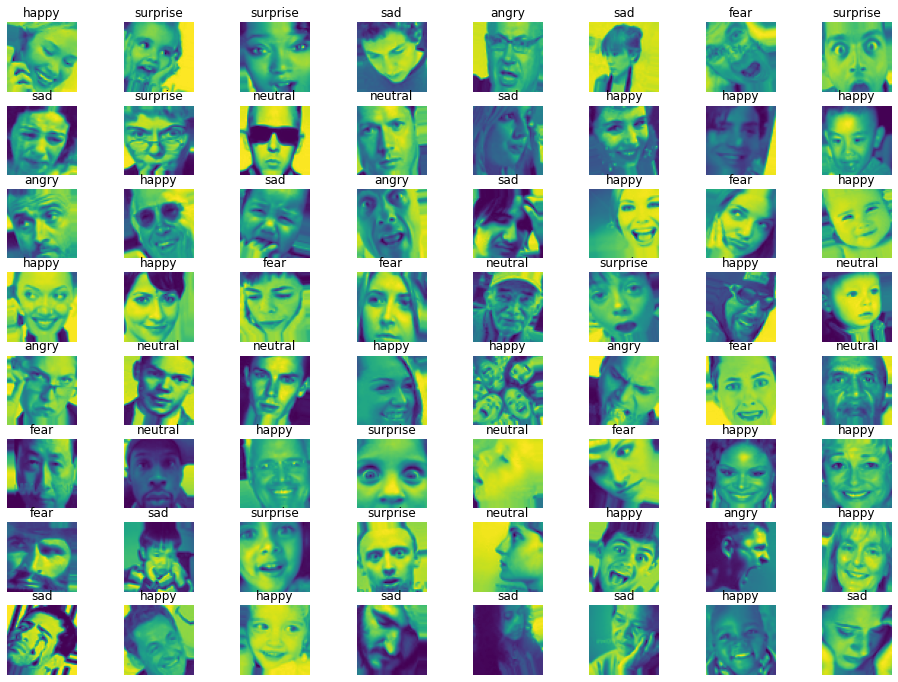

In [8]:
l=8
w=8
fig,axes=plt.subplots(l,w,figsize=(16,12))
axes=axes.ravel()

for i in np.arange(0,l*w):
    axes[i].imshow(train_images[i])
    axes[i].set_title(label_names[np.argmax(train_labels[i])])
    axes[i].axis('off')
    
    plt.subplots_adjust(wspace=0.5)

In [9]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(7,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
train_set=ImageDataGenerator(rotation_range=15,
                            rescale=1./255,
                              shear_range=0.2,
                            zoom_range=0.1,
                            width_shift_range=0.1,
                            height_shift_range=0.1)
train_gen=train_set.flow_from_directory(train_dir,target_size=(48,48),shuffle=True,class_mode='categorical',batch_size=64,color_mode='grayscale')

Found 28820 images belonging to 7 classes.


In [11]:
test_dir=r"/Users/soulu/Documents/#Tamanna Singh/CalTech/Course End Projects/Emotion Recognition/data/test"
test_set=ImageDataGenerator(rotation_range=15,
                            rescale=1./255,
                            shear_range=0.2,
                             zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1)
valid_gen=test_set.flow_from_directory(test_dir,target_size=(48,48),shuffle=True,class_mode='categorical',batch_size=64,color_mode='grayscale')

Found 7066 images belonging to 7 classes.


In [12]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
early_stop=EarlyStopping(monitor='val_loss',patience=2)
lr=ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_delta=0.0001)
callback=[early_stop,lr]

In [13]:
h1=model.fit_generator(train_gen,steps_per_epoch=(28820//64),epochs=10,validation_data=valid_gen,validation_steps=(7066//64),callbacks=callback)

Epoch 1/10
450/450 [==============================] - 154s 338ms/step - loss: 1.9913 - accuracy: 0.2307 - val_loss: 2.0028 - val_accuracy: 0.2585 - lr: 0.0010
Epoch 2/10
450/450 [==============================] - 153s 340ms/step - loss: 1.6678 - accuracy: 0.3452 - val_loss: 1.8007 - val_accuracy: 0.3088 - lr: 0.0010
Epoch 3/10
450/450 [==============================] - 156s 347ms/step - loss: 1.4690 - accuracy: 0.4334 - val_loss: 1.4988 - val_accuracy: 0.4277 - lr: 0.0010
Epoch 4/10
450/450 [==============================] - 170s 378ms/step - loss: 1.3689 - accuracy: 0.4760 - val_loss: 1.3699 - val_accuracy: 0.4791 - lr: 0.0010
Epoch 5/10
450/450 [==============================] - 182s 405ms/step - loss: 1.3034 - accuracy: 0.5021 - val_loss: 1.2285 - val_accuracy: 0.5294 - lr: 0.0010
Epoch 6/10
450/450 [==============================] - 197s 438ms/step - loss: 1.2600 - accuracy: 0.5208 - val_loss: 1.2466 - val_accuracy: 0.5203 - lr: 0.0010
Epoch 7/10
450/450 [==========================

In [14]:
h1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

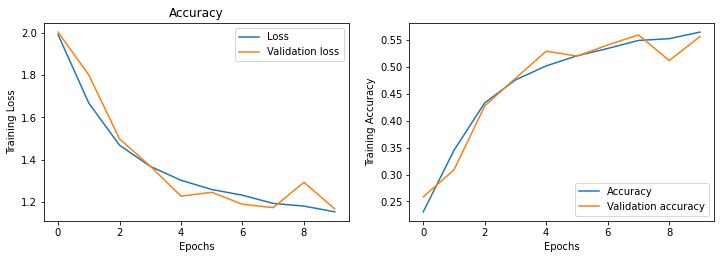

In [15]:
plt.figure(figsize=(12,8))
plt.title('Loss Evaluation')
plt.subplot(2,2,1)
plt.plot(h1.history['loss'],label='Loss')
plt.plot(h1.history['val_loss'],label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()

plt.title('Accuracy')
plt.subplot(2,2,2)
plt.plot(h1.history['accuracy'],label='Accuracy')
plt.plot(h1.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.legend()
plt.show()

In [16]:
test_dir=r"/Users/soulu/Documents/#Tamanna Singh/CalTech/Course End Projects/Emotion Recognition/data/test"
test_set=ImageDataGenerator(rotation_range=15,
                            rescale=1./255,
                            shear_range=0.2,
                             zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1)
test_gen=test_set.flow_from_directory(test_dir,target_size=(48,48),shuffle=True,class_mode='categorical',batch_size=64,color_mode='grayscale')

Found 7066 images belonging to 7 classes.


In [17]:
evaluate=model.evaluate_generator(test_gen,steps=(7066//64),verbose=1)

110/110 [==============================] - 13s 120ms/step - loss: 1.1815 - accuracy: 0.5514


In [18]:
print('Accuracy during test {}'.format(evaluate[1]))

Accuracy during test 0.5514204502105713


In [19]:
original=[]
predictions=[]
images=[]

for i in range(len(os.listdir(test_dir))):
    for items in os.listdir(os.path.join(test_dir,label_names[i])):
        image=cv2.imread(os.path.join(test_dir,label_names[i],items))
        image=cv2.resize(image,(48,48))
        images.append(image)
        image=image/255
        image=image.reshape((-1,48,48,1))
        predict=model.predict(image)
        predict=np.argmax(predict)
        predictions.append(predict)
        original.append(i)

1/1 [==============================] - 0s 23ms/step


In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [21]:
score=accuracy_score(original,predictions)
print('Test Accuracy {}'.format(score))

Test Accuracy 0.08222473818284744


In [22]:
print(classification_report(np.asarray(original),np.asarray(predictions)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       960
           1       0.00      0.00      0.00       111
           2       0.00      0.00      0.00      1018
           3       0.24      0.25      0.25      1825
           4       0.18      0.01      0.03      1216
           5       0.20      0.09      0.12      1139
           6       0.00      0.00      0.00       797
           7       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         0

    accuracy                           0.08      7066
   macro avg       0.04      0.02      0.03      7066
weighted avg       0.13   

Text(33.0, 0.5, 'Original')

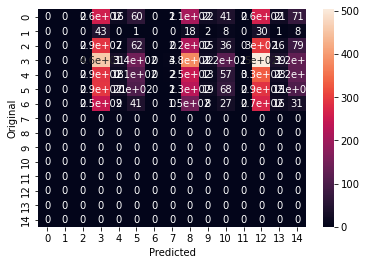

In [23]:
cm=confusion_matrix(np.asarray(original),np.asarray(predictions))
ax=plt.subplot()

sn.heatmap(cm,annot=True,ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Original')


In [24]:
train_set=ImageDataGenerator(rotation_range=15,
                            rescale=1./255,
                              shear_range=0.2,
                            zoom_range=0.1,
                            width_shift_range=0.1,
                            height_shift_range=0.1)
train_gen=train_set.flow_from_directory(train_dir,target_size=(256,256),shuffle=True,class_mode='categorical',batch_size=64)

Found 28820 images belonging to 7 classes.


In [25]:
train_images,train_labels=next(train_gen)

In [26]:
train_images.shape

(64, 256, 256, 3)

In [27]:
train_labels.shape

(64, 7)

In [28]:
label_names={0:'angry',1:'disgust',2:'fear',3:'happy',4:'neutral',5:'sad',6:'surprise'}

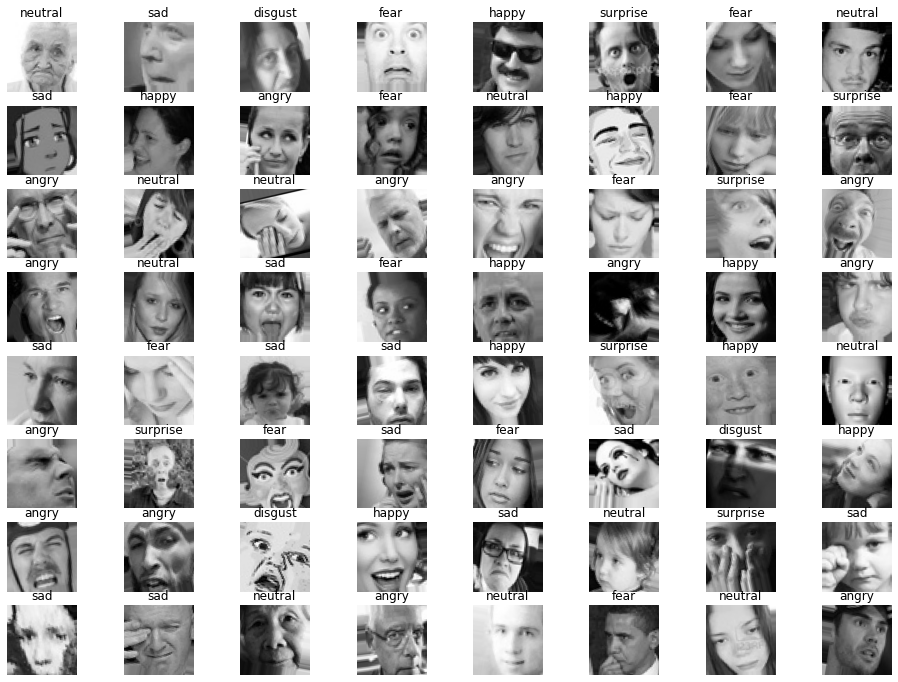

In [29]:
l=8
w=8
fig,axes=plt.subplots(l,w,figsize=(16,12))
axes=axes.ravel()

for i in np.arange(0,l*w):
    axes[i].imshow(train_images[i])
    axes[i].set_title(label_names[np.argmax(train_labels[i])])
    axes[i].axis('off')
    
    plt.subplots_adjust(wspace=0.5)

In [30]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [31]:
basemodel=InceptionV3(weights='imagenet',include_top=False,input_tensor=Input(shape=(256,256,3)))

87910968/87910968 [==============================] - 7s 0us/step


In [32]:
basemodel.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 127, 127, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization_6 (Bat  (None, 127, 127, 32)         96        ['conv2d_4[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 activation (Activation)     (None, 127, 127, 32)         0         ['batch_normalizati

In [33]:
for layers in basemodel.layers[:-10]:
    layers.trainable=False

In [34]:
from tensorflow.keras import backend as k

In [35]:
def precision(y_true,y_pred):
    true_positives=k.sum(k.round(k.clip(y_true*y_pred,0,1)))
    predicted_positives=k.sum(k.round(k.clip(y_pred,0,1)))
    precision=true_positives/(predicted_positives+k.epsilon())
    return precision
def recall(y_true,y_pred):
    true_positives=k.sum(k.round(k.clip(y_true*y_pred,0,1)))
    predicted_positives=k.sum(k.round(k.clip(y_pred,0,1)))
    recall=true_positives/(predicted_positives+k.epsilon())
    return recall
def f1(y_true,y_pred):
    def recall(y_true,y_pred):
        true_positives=k.sum(k.round(k.clip(y_true*y_pred,0,1)))
        predicted_positives=k.sum(k.round(k.clip(y_pred,0,1)))
        recall=true_positives/(predicted_positives+k.epsilon())
        return recall
    def precision(y_true,y_pred):
        true_positives=k.sum(k.round(k.clip(y_true*y_pred,0,1)))
        predicted_positives=k.sum(k.round(k.clip(y_pred,0,1)))
        precision=true_positives/(predicted_positives+k.epsilon())
        return precision
    precision=precision(y_true,y_pred)
    recall=recall(y_true,y_pred)
    return 2*((precision*recall)/(precision+recall+k.epsilon()))

In [36]:
headmodel=basemodel.output
headmodel=AveragePooling2D(pool_size=(4,4))(headmodel)
headmodel=Flatten(name='flatten')(headmodel)

headmodel=Dense(256,activation='relu')(headmodel)
headmodel=BatchNormalization()(headmodel)
headmodel=Dropout(0.5)(headmodel)

headmodel=Dense(128,activation='relu')(headmodel)
headmodel=BatchNormalization()(headmodel)
headmodel=Dropout(0.5)(headmodel)

headmodel=Dense(64,activation='relu')(headmodel)
headmodel=BatchNormalization()(headmodel)
headmodel=Dropout(0.5)(headmodel)

headmodel=Dense(7,activation='softmax')(headmodel)

model=Model(inputs=basemodel.input,outputs=headmodel)

In [37]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [38]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 127, 127, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization_6 (Bat  (None, 127, 127, 32)         96        ['conv2d_4[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 activation (Activation)     (None, 127, 127, 32)         0         ['batch_normalization_6[0]

In [39]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=2)
callback=[early_stop]

In [40]:
test_path=r"/Users/soulu/Documents/#Tamanna Singh/CalTech/Course End Projects/Emotion Recognition/data/test"
test_set=ImageDataGenerator(rotation_range=15,
                            rescale=1./255,
                              shear_range=0.2,
                            zoom_range=0.1,
                            width_shift_range=0.1,
                            height_shift_range=0.1)
valid_gen=test_set.flow_from_directory(test_path,target_size=(256,256),shuffle=True,class_mode='categorical',batch_size=64)

Found 7066 images belonging to 7 classes.


In [41]:
train_gen.n,valid_gen.n

(28820, 7066)

In [42]:
train_gen.batch_size

64

In [ ]:
history=model.fit_generator(train_gen,steps_per_epoch=(train_gen.n//train_gen.batch_size),epochs=10,validation_data=valid_gen,validation_steps=(valid_gen.n//valid_gen.batch_size),callbacks=callback)

Epoch 1/10
334/450 [=====================>........] - ETA: 6:10 - loss: 2.3521 - accuracy: 0.1934

In [ ]:
history.history.keys()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

plt.title('Model Loss and Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy and Loss')
plt.legend(['Training Accuracy', 'Training Loss'])

In [ ]:
plt.plot(history.history['val_loss'])
plt.title('Model Loss During Cross-Validation')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend(['Validation Loss'])

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Progress During Cross-Validation')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend(['Validation Accuracy'])

In [ ]:
test_path=r"C:\Users\HP\data\test"
test_set=ImageDataGenerator(rotation_range=15,
                            rescale=1./255,
                              shear_range=0.2,
                            zoom_range=0.1,
                            width_shift_range=0.1,
                            height_shift_range=0.1)
test_gen=test_set.flow_from_directory(test_path,target_size=(256,256),shuffle=True,class_mode='categorical',batch_size=64)

In [ ]:
evaluate = model.evaluate_generator(test_gen, steps = test_gen.n//64, verbose = 1)

In [ ]:
print('Accuracy during test: {}'.format(evaluate[1]))

In [ ]:
predictions=[]
original=[]
images=[]

for i in range(len(os.listdir(test_path))):
    for item in os.listdir(os.path.join(test_path,str(label_names[i]))):
        image=cv2.imread(os.path.join(test_path,str(label_names[i]),item))
        image=cv2.resize(image,(256,256))
        images.append(image)
        image=image/255
        image=image.reshape((-1,256,256,3))
        predict=model.predict(image)
        predict=np.argmax(predict)
        predictions.append(predict)
        original.append(i)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
score = accuracy_score(original,predictions)
print("Test Accuracy : {}".format(score))

In [ ]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(images[i])
    axes[i].set_title('Guess={}\nTrue={}'.format(str(label_names[predictions[i]]), str(label_names[original[i]])))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1.2)

In [ ]:
print(classification_report(np.asarray(original), np.asarray(predictions)))

In [ ]:
cm = confusion_matrix(np.asarray(original), np.asarray(predictions))
ax = plt.subplot()
sn.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')